<h1><center>Laboratorio 3: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Emilio Roa


### **Link de repositorio de GitHub:** `http://....`

### Reglas:

- **Grupos de máximo 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

Requirement already up-to-date: plotly in /home/roa/.local/lib/python3.8/site-packages (5.10.0)


# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [3]:
import pandas as pd
df_grades = pd.read_json('students_grades.json', dtype=True)
df_grades['math score'] = pd.to_numeric(df_grades["math score"])
df_grades['reading score'] = pd.to_numeric(df_grades["reading score"])
df_grades['writing score'] = pd.to_numeric(df_grades["writing score"])
print(df_grades.shape)

df_grades.head() 


(1400, 9)


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


In [4]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   names                        1400 non-null   object 
 1   gender                       1400 non-null   object 
 2   race/ethnicity               1400 non-null   object 
 3   parental level of education  1400 non-null   object 
 4   lunch                        1400 non-null   object 
 5   test preparation course      1400 non-null   object 
 6   math score                   1360 non-null   float64
 7   reading score                1360 non-null   float64
 8   writing score                1353 non-null   float64
dtypes: float64(3), object(6)
memory usage: 98.6+ KB



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [X] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [X] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [X] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [X] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [X] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [X] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [ ] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [5]:
from pydoc import describe
from tkinter.font import names
from IPython.display import display


def exploratory_data_analysis(dataframe):
    print('1.- El dataframe tiene {} filas y {} columnas.'.format(dataframe.shape[0], dataframe.shape[1]))
    columns = dataframe.columns.values
    separator = ', '
    lista = separator.join(x for x in columns)
    print("2.- Los nombres de las columnas son: " + lista)
    print('-'*100)

    print("3.- Primeros 5 registros: ")
    display(dataframe.head())
    print('-'*100)

    print("3.- Últimos 5 registros: ")
    display(dataframe.tail())
    print('-'*100)

    print("3.- Muestreo aleatorio de 5 muestras: ")
    display(dataframe.sample(5))
    print('-'*100)

    print("4.- Descripción variables numéricas: ")
    num_df = dataframe._get_numeric_data()
    display(num_df.describe())
    print('-'*100)

    print("5.- Cantidad de valores nulos por columna:")
    display(dataframe.isna().sum())
    print('-'*100)

    print("6.- Cantidad de valores únicos por columna:")
    display(dataframe.nunique())
    print('-'*100)

    print("7.- Presenta un total de {} filas con nombres duplicados.".format(dataframe.duplicated(subset="names").sum()))
    print('-'*100)


    print("8.- Las filas con nombres duplicados son:")
    display(dataframe.loc[dataframe.duplicated(subset="names"), :])
    print('-'*100)

    print("9.- Boxplot de notas:")
    dataframe.plot.box(by=["math score", "reading score", "writing score"], figsize=(10,8))

    








1.- El dataframe tiene 1400 filas y 9 columnas.
2.- Los nombres de las columnas son: names, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score
----------------------------------------------------------------------------------------------------
3.- Primeros 5 registros: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


----------------------------------------------------------------------------------------------------
3.- Últimos 5 registros: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


----------------------------------------------------------------------------------------------------
3.- Muestreo aleatorio de 5 muestras: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
151,Dana Kramer,female,group C,high school,free/reduced,none,34.0,42.0,151.0
742,Heike Miller,female,group B,associate's degree,standard,none,53.0,58.0,65.0
203,Curt Ruiz,male,group C,some high school,standard,completed,78.0,72.0,69.0
685,Sherrie Ford,female,group B,some high school,standard,none,193.0,64.0,NaN
1160,Lynda Stotts,female,group D,some college,standard,none,74.0,89.0,84.0


----------------------------------------------------------------------------------------------------
4.- Descripción variables numéricas: 


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000


----------------------------------------------------------------------------------------------------
5.- Cantidad de valores nulos por columna:


names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

----------------------------------------------------------------------------------------------------
6.- Cantidad de valores únicos por columna:


names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

----------------------------------------------------------------------------------------------------
7.- Presenta un total de 247 filas con nombres duplicados.
----------------------------------------------------------------------------------------------------
8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0


----------------------------------------------------------------------------------------------------
9.- Boxplot de notas:


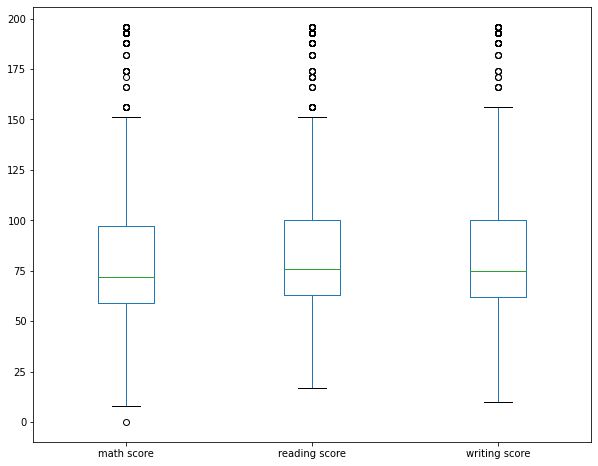

In [6]:
exploratory_data_analysis(df_grades)

**Justificación:**

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

```
Al observar los datos del dataframe se puede observar que existen 247 registros con nombres duplicados, lo cual no corresponde y sugiere algún error en la forma en que se agregan los datos a la base de datos. Ya que se sabe que existían 875 matrículas y se tenían 1153 registros de alumnos. Por otra parte existen varias notas con valores mayores que el máximo permitido, lo cual es un error, ya que la escala de las notas debería ser de 0 a 100. Esto afecta en los promedios y desviaciones estándar de cada asignatura. Además, se obsevó la presencia de valores nulos en las notas de cada asignatura (40 math, 40 reading y 47 writing).

En cuanto a los boxplot se puede ver que hay gran presencia de outliers en la parte de arriba, los cuales sabemos que son datos malos que no deberían estar. Esto afecta en la distribución de las notas inflando los promedios de cada asignatura. Pese a esto se puede ver que la mayoría de las notas se encuentran promediadas alrededor del 75%.


```

**Respuesta Esperada:**

1.- El dataframe tiene 1400 filas y 9 columnas.
2.- Los nombres de las columnas son: names, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score
----------------------------------------------------------------------------------------------------
3.- Primeros 5 registros: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


----------------------------------------------------------------------------------------------------
3.- Últimos 5 registros: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


----------------------------------------------------------------------------------------------------
3.- Muestreo aleatorio de 5 muestras: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
938,Brenna Pate,female,group A,bachelor's degree,standard,none,51.0,49.0,51.0
38,Daniel Cartwright,male,group C,high school,standard,completed,86.0,81.0,80.0
226,Kari Mitchell,female,group D,some college,free/reduced,none,77.0,86.0,86.0
268,Tina Willis,female,group C,high school,free/reduced,none,42.0,62.0,60.0
1175,Richard Benitez,male,group B,some college,free/reduced,completed,59.0,65.0,66.0


----------------------------------------------------------------------------------------------------
4.- Descripción variables numéricas: 


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000


----------------------------------------------------------------------------------------------------
5.- Cantidad de valores nulos por columna:


names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

----------------------------------------------------------------------------------------------------
6.- Cantidad de valores únicos por columna:


names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

----------------------------------------------------------------------------------------------------
7.- Presenta un total de 247 filas con nombres duplicados.
----------------------------------------------------------------------------------------------------
8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0


----------------------------------------------------------------------------------------------------
9.- Boxplot de notas:


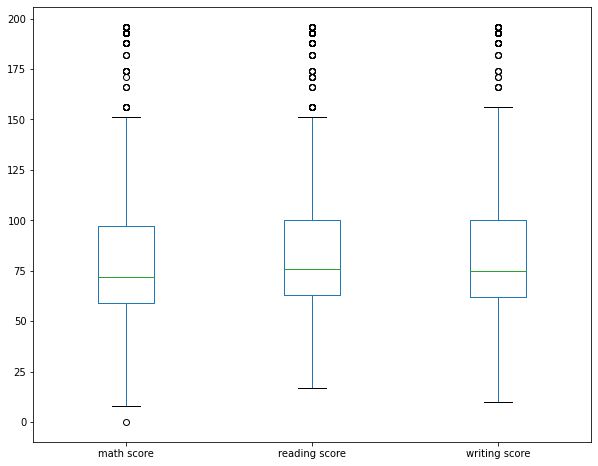

In [7]:
exploratory_data_analysis(df_grades)

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Una vez limpiado cada uno de los `DataFrames` compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [ ] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

In [8]:
def clean_data(df):
    df = df.drop_duplicates(subset='names')
    df = df.dropna()
    df = df.loc[df['math score'] <= 100, :]
    df = df.loc[df['reading score'] <= 100, :]
    df = df.loc[df['writing score'] <= 100, :]
    
    return df

In [9]:
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1.- El dataframe tiene 875 filas y 9 columnas.
2.- Los nombres de las columnas son: names, gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score
----------------------------------------------------------------------------------------------------
3.- Primeros 5 registros: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0


----------------------------------------------------------------------------------------------------
3.- Últimos 5 registros: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


----------------------------------------------------------------------------------------------------
3.- Muestreo aleatorio de 5 muestras: 


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1156,Maria Murphy,female,group D,bachelor's degree,free/reduced,none,78.0,90.0,93.0
38,Daniel Cartwright,male,group C,high school,standard,completed,86.0,81.0,80.0
351,Michael Gaccione,male,group B,some college,free/reduced,none,54.0,54.0,45.0
902,Nicole Nesbitt,female,group C,some college,standard,none,82.0,90.0,94.0
202,John Johnson,male,group A,some college,standard,completed,61.0,51.0,52.0


----------------------------------------------------------------------------------------------------
4.- Descripción variables numéricas: 


,math score,reading score,writing score
count,875.000000,875.000000,875.000000
mean,66.225143,69.195429,68.114286
std,15.076716,14.629270,15.174220
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.500000
50%,66.000000,70.000000,69.000000
75%,76.500000,79.000000,79.000000
max,100.000000,100.000000,100.000000


----------------------------------------------------------------------------------------------------
5.- Cantidad de valores nulos por columna:


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

----------------------------------------------------------------------------------------------------
6.- Cantidad de valores únicos por columna:


names                          875
gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      79
reading score                   72
writing score                   77
dtype: int64

----------------------------------------------------------------------------------------------------
7.- Presenta un total de 0 filas con nombres duplicados.
----------------------------------------------------------------------------------------------------
8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


----------------------------------------------------------------------------------------------------
9.- Boxplot de notas:


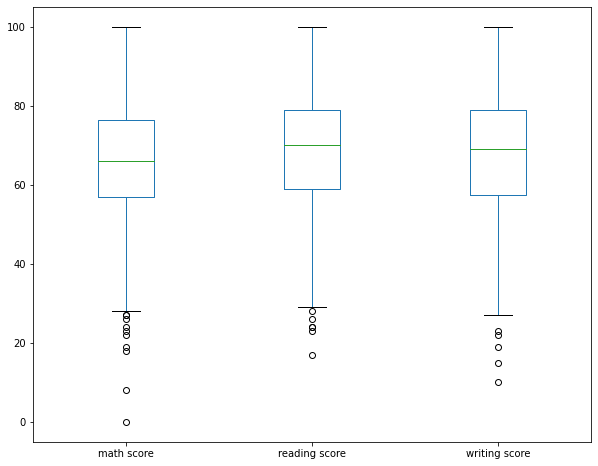

In [10]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Es posible observar que la función clean_dataset() es capaz de realizar una limpieza sobre los datos y eliminar las anomalías encontradas en la sección anterior. Primero gracias a .drop_duplicates() y dropna() se pudo eliminar las filas con nombres repetidos y con valores nulos y luego se filtraron aquellos registros que tenían una nota en alguna de las asignaturas mayor a 100. Esto fue sufuciente para limpiar el dataset.
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas que se escapan del rango [1,7] y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [11]:


def nota_chilena(dataframe_in, columna):
  df_out = dataframe_in.copy()
  s = df_out[columna].apply(lambda x: (x*0.06 + 1))
  df_out[columna] = s
  return df_out

In [12]:
df_chilean_grades = nota_chilena(df_grades, 'math score')
df_chilean_grades = nota_chilena(df_chilean_grades, 'reading score')
df_chilean_grades = nota_chilena(df_chilean_grades, 'writing score')


In [13]:
df_chilean_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22


### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del DataFrame original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el DataFrame original.


**Respuesta:**

In [14]:
def alumnos_promedio(dataframe_in):
  df_out = dataframe_in.copy()
  df_out['GPA'] = df_out.iloc[:, 6:8].mean(axis=1)
  return df_out 
 

**Respuesta Esperada:**

In [15]:
df_chilean_grades = alumnos_promedio(df_chilean_grades)
df_chilean_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.49
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.74
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.17
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.68
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.40


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [16]:
def reprobados_destacados(dataframe_in):
    df_1 = dataframe_in.copy()
    df_1_mask=df_1['GPA']<4.00
    df_1 = df_1[df_1_mask]

    df_2 = dataframe_in.copy()
    df_2.loc[df_2['GPA']<4.00,'GPA']='R'

    df_3 = dataframe_in.copy()
    df_3_mask1= df_3['math score']>5.800 
    df_3_mask2 = df_3['reading score']>5.800
    df_3_mask3 = df_3['writing score']>5.800
    df_3 = df_3[df_3_mask1 & df_3_mask2 & df_3_mask3].sort_values('GPA',ascending=False)

    return df_1, df_2, df_3


In [17]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_chilean_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.49
13,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
26,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.64
52,Lisa Watters,female,group D,master's degree,free/reduced,none,3.40,4.54,4.24,3.97
55,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.95
...,...,...,...,...,...,...,...,...,...,...
1371,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.91
1373,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.83
1389,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.61
1391,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.74


In [18]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.74
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.17
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.68
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.4
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.32
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.2
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.45


In [19]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
677,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
1352,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
514,David Martinez,male,group E,associate's degree,free/reduced,completed,7.00,7.00,6.58,7.00
384,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
475,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.97
...,...,...,...,...,...,...,...,...,...,...
393,Christopher Martinez,male,group C,bachelor's degree,standard,completed,5.98,5.92,6.04,5.95
1359,Earnest Cole,male,group D,some college,standard,completed,5.92,5.92,6.28,5.92
96,Harry Berry,male,group B,associate's degree,standard,completed,5.86,5.92,5.92,5.89
300,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.89


**Respuesta:**

```
Escriba aqui su respuesta
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [38]:
def consulta_gpa(dataframe_in, lista_alumnos):
    df_out = dataframe_in.copy()
    df_mask = df_out['names'].isin(lista_alumnos)
    df_out = df_out[df_mask]
    return df_out[['names', 'GPA']]
    
    


lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,GPA
296,Lucille Stanphill,5.95
564,Marcus Mcfarland,4.81
637,Matthew Freeman,4.03
640,Dana Mojica,R
1054,Robert Strain,4.48
1065,Ronald Jett,R
1068,Hazel Posey,R
1195,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [44]:
# Código para quintiles 
df_chilean_grades['GPA cuantiles'] = pd.qcut(df_chilean_grades['GPA'], 5, labels=["Bajísimo", "Bajo", "Medio", "Alto", "Muy alto"])
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.

# Código de gráfico 
fig = px.scatter(
    df_chilean_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


```
En el plot se puede observar que mientras mayor es la educación de los padres, los cuantiles de bajísimo y muy alto tienden a poseer un promedio de notas mayor. Teniendo así que los peores promedios tienden a estar asociados a alumnos cuyos padres se encuentran en el grado de some high school y high school. 
Cabe destacar además, que el porcetanje o cantidad de alumnos reprobados es mucho mayor a medida que se va viendo un menor nivel de educación parental.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>